Epoch 1/20
782/782 [==============================] - 24s 27ms/step - loss: 1.5318 - accuracy: 0.4383 - val_loss: 1.2829 - val_accuracy: 0.5552
Epoch 2/20
782/782 [==============================] - 21s 27ms/step - loss: 0.9838 - accuracy: 0.6524 - val_loss: 0.8724 - val_accuracy: 0.6902
Epoch 3/20
782/782 [==============================] - 20s 26ms/step - loss: 0.7492 - accuracy: 0.7363 - val_loss: 0.7448 - val_accuracy: 0.7394
Epoch 4/20
782/782 [==============================] - 20s 26ms/step - loss: 0.5902 - accuracy: 0.7932 - val_loss: 0.6832 - val_accuracy: 0.7651
Epoch 5/20
782/782 [==============================] - 20s 26ms/step - loss: 0.4676 - accuracy: 0.8360 - val_loss: 0.6985 - val_accuracy: 0.7661
Epoch 6/20
782/782 [==============================] - 20s 26ms/step - loss: 0.3607 - accuracy: 0.8735 - val_loss: 0.7032 - val_accuracy: 0.7778
Epoch 7/20
782/782 [==============================] - 20s 26ms/step - loss: 0.2734 - accuracy: 0.9028 - val_loss: 0.7952 - val_accuracy:

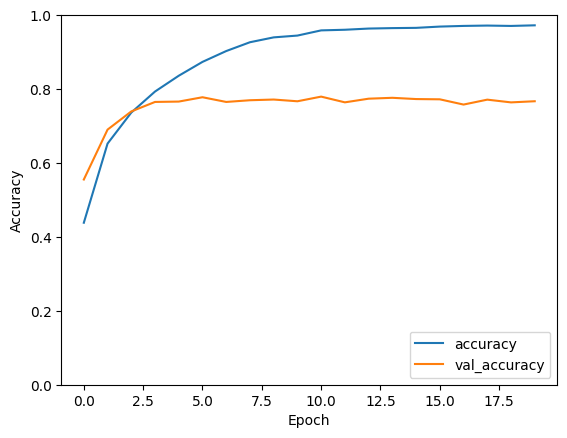

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# x (input tensor) is stored in a variable shortcut to preserve the original information.
# x is passed through two convolutional layers with the same number of filters.
# After the convolutions, the output of the second convolution is added to the original input tensor (shortcut).
# This help in the better flow of gradients during training and helps in avoiding the vanishing gradient problem.

def residual_block(x, filters):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
    x = layers.Add()([shortcut, x])
    x = layers.Activation('relu')(x)
    return x

def vgg16_with_residual_blocks():
    input_layer = layers.Input(shape=(32, 32, 3))

    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(input_layer)
    x = residual_block(x, 64)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = residual_block(x, 128)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = residual_block(x, 256)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    output_layer = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

model = vgg16_with_residual_blocks()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


**Analysis**

VGG 16 with residual skip connections achieves higher accuracy compared to the  VGG-16 with inception module. VGG-16 with integrated inception module gave testing accuracy of 75% whereas the VGG-16 using residual blocks gave the testing accuracy of 77%. This happened since residual skip connections allow better information flow and gradient propagation through the network, which helps to avoid the vanishing gradient problem.

Less Training Time: The model also converges faster during training due to the improved gradient flow.

Overall, using residual skip connections in the VGG-16 model leads to improved performance on the CIFAR-10 dataset.